#Snippets and Programs from Chapter 5: Playing with Sets and Probability

In [1]:
%matplotlib inline

In [2]:
#P125: Finding the power set of a set
>>> from sympy import FiniteSet
>>> s = FiniteSet(1, 2, 3)
>>> ps = s.powerset()
>>> ps

FiniteSet(EmptySet, {1}, {2}, {3}, {1, 2}, {1, 3}, {2, 3}, {1, 2, 3})

In [3]:
#P126: Union of two Sets
>>> from sympy import FiniteSet 
>>> s = FiniteSet(1, 2, 3)
>>> t = FiniteSet(2, 4, 6)
>>> s.union(t)
{1, 2, 3, 4, 6}

{1, 2, 3, 4, 6}

In [4]:
#P127: Intersection of two Sets
>>> from sympy import FiniteSet
>>> s = FiniteSet(1, 2) 
>>> t = FiniteSet(2, 3) 
>>> s.intersect(t)

{2}

In [5]:
#P127/128: Cartesian product of two Sets
>>> from sympy import FiniteSet 
>>> s = FiniteSet(1, 2)
>>> t = FiniteSet(3, 4)
>>> p = s*t
>>> for elem in p:
        print(elem)

(1, 3)
(2, 3)
(1, 4)
(2, 4)


In [6]:
#P130: Different gravity, different results
from sympy import FiniteSet, pi
def time_period(length, g):
    T = 2*pi*(length/g)**0.5
    return T

if __name__ == '__main__':
    L = FiniteSet(15, 18, 21, 22.5, 25)
    g_values = FiniteSet(9.8, 9.78, 9.83)
    print('{0:^15}{1:^15}{2:^15}'.format('Length(cm)', 'Gravity(m/s^2)', 'Time Period(s)'))
    for elem in L*g_values:
        l = elem[0]
        g = elem[1]
        t = time_period(l/100, g)
        print('{0:^15}{1:^15}{2:^15.3f}'.format(float(l), float(g), float(t)))


  Length(cm)   Gravity(m/s^2) Time Period(s) 
     22.5           9.78           0.953     
     15.0           9.78           0.778     
     22.5            9.8           0.952     
     18.0           9.78           0.852     
     15.0            9.8           0.777     
     22.5           9.83           0.951     
     21.0           9.78           0.921     
     18.0            9.8           0.852     
     15.0           9.83           0.776     
     25.0           9.78           1.005     
     21.0            9.8           0.920     
     18.0           9.83           0.850     
     25.0            9.8           1.004     
     21.0           9.83           0.918     
     25.0           9.83           1.002     


In [8]:
#P132: Probability of a Prime number appearing when a 20-sided dice is rolled
def probability(space, event):
    return len(event)/len(space)

def check_prime(number): 
    if number != 1:
        for factor in range(2, number):
            if number % factor == 0:
                return False
    else:
        return False
    return True

if __name__ == '__main__':
    space = FiniteSet(*range(1, 21))
    primes = []
    for num in space:
        if check_prime(num):
            primes.append(num)
    event= FiniteSet(*primes)
    p = probability(space, event)
    print('Sample space: {0}'.format(space))
    print('Event: {0}'.format(event))
    print('Probability of rolling a prime: {0:.5f}'.format(p))

Sample space: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Event: {2, 3, 5, 7, 11, 13, 17, 19}
Probability of rolling a prime: 0.40000


In [9]:
#P134: Probability of event A or event B
>>> from sympy import FiniteSet
>>> s = FiniteSet(1, 2, 3, 4, 5, 6) 
>>> a = FiniteSet(2, 3, 5)
>>> b = FiniteSet(1, 3, 5)
>>> e = a.union(b) 
>>> len(e)/len(s)

0.6666666666666666

In [10]:
#P134: Probability of event A and event B
>>> from sympy import FiniteSet
>>> s = FiniteSet(1, 2, 3, 4, 5, 6) 
>>> a = FiniteSet(2, 3, 5)
>>> b = FiniteSet(1, 3, 5)
>>> e = a.intersect(b)
>>> len(e)/len(s)

0.3333333333333333

In [11]:
#P135: Can you Roll that score?

'''
Roll a die until the total score is 20
'''
import matplotlib.pyplot as plt
import random

target_score = 20
def roll():
    return random.randint(1, 6)

if __name__ == '__main__':
    score = 0
    num_rolls = 0
    while score < target_score:
        die_roll = roll()
        num_rolls += 1
        print('Rolled: {0}'.format(die_roll))
        score += die_roll
    print('Score of {0} reached in {1} rolls'.format(score, num_rolls))

Rolled: 5
Rolled: 6
Rolled: 1
Rolled: 3
Rolled: 4
Rolled: 2
Score of 21 reached in 6 rolls


In [1]:
#P136: Is the target score possible?
from sympy import FiniteSet
import random
def find_prob(target_score, max_rolls):
    die_sides = FiniteSet(1, 2, 3, 4, 5, 6)
    # sample space
    s = die_sides**max_rolls
    # Find the event set
    if max_rolls > 1:
        success_rolls = []
        for elem in s:
            if sum(elem) >= target_score:
                success_rolls.append(elem)
    else:
        if target_score > 6:
            success_rolls = []
        else:
            success_rolls = []
            for roll in die_sides:
                if roll >= target_score:
                    success_rolls.append(roll)
    e = FiniteSet(*success_rolls)
    # calculate the probability of reaching target score
    return len(e)/len(s)
if __name__ == '__main__':
    target_score = int(input('Enter the target score: '))
    max_rolls  = int(input('Enter the maximum number of rolls allowed: '))
    p = find_prob(target_score, max_rolls)
    print('Probability:  {0:.5f}'.format(p))

Enter the target score:  14
Enter the maximum number of rolls allowed:  4


Probability:  0.55633


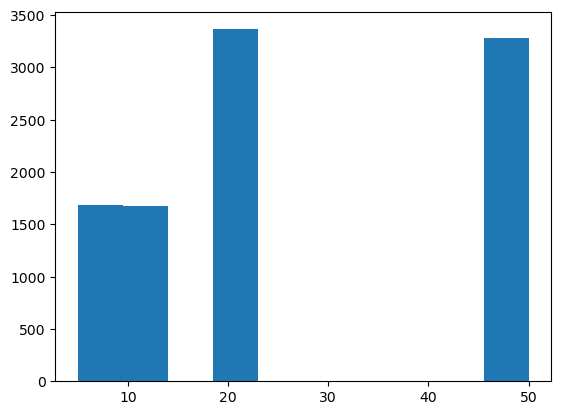

In [2]:
#P139: Simulate a fictional ATM
'''
Simulate a fictional ATM that dispenses dollar bills
of various denominations with varying probability
'''

import random
import matplotlib.pyplot as plt

def get_index(probability):
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    r = random.random()
    for index, sp in enumerate(sum_probability):
        if r <= sp:
            return index
    return len(probability)-1

def dispense():
    dollar_bills = [5, 10, 20, 50]
    probability = [1/6, 1/6, 1/3, 1/3]
    bill_index = get_index(probability)
    return dollar_bills[bill_index]

# Simulate a large number of bill withdrawls
if __name__ == '__main__':
    bill_dispensed = []
    for i in range(10000):
        bill_dispensed.append(dispense())
    # plot a histogram 
    plt.hist(bill_dispensed)
    plt.show()
    

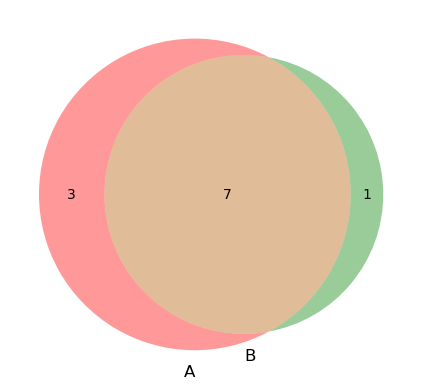

In [4]:
#P140: Draw a Venn diagram for two sets
'''
Draw a Venn diagram for two sets
'''
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
from sympy import FiniteSet
def draw_venn(sets):
    venn2(subsets=sets)    
    plt.show()
    
if __name__ == '__main__':
    s1 = FiniteSet(1, 3, 5, 7, 9, 11, 13, 15, 17, 19)
    s2 = FiniteSet(2, 3, 5, 7, 11, 13, 17, 19)
    draw_venn([s1, s2])